Original class distribution:
Label
BENIGN              2096484
DoS Hulk             172849
DDoS                 128016
PortScan              90819
DoS GoldenEye         10286
FTP-Patator            5933
DoS slowloris          5385
DoS Slowhttptest       5228
SSH-Patator            3219
Bot                    1953
Brute Force            1470
XSS                     652
Infiltration             36
Sql Injection            21
Heartbleed               11
Name: count, dtype: int64

After removing minority classes (min_samples=1000):
Label
BENIGN              2096484
DoS Hulk             172849
DDoS                 128016
PortScan              90819
DoS GoldenEye         10286
FTP-Patator            5933
DoS slowloris          5385
DoS Slowhttptest       5228
SSH-Patator            3219
Bot                    1953
Brute Force            1470
Name: count, dtype: int64
New class distribution:
 Label
5     172849
3     128016
0     100000
9      90819
4      10286
8       5933
7       5385
6   

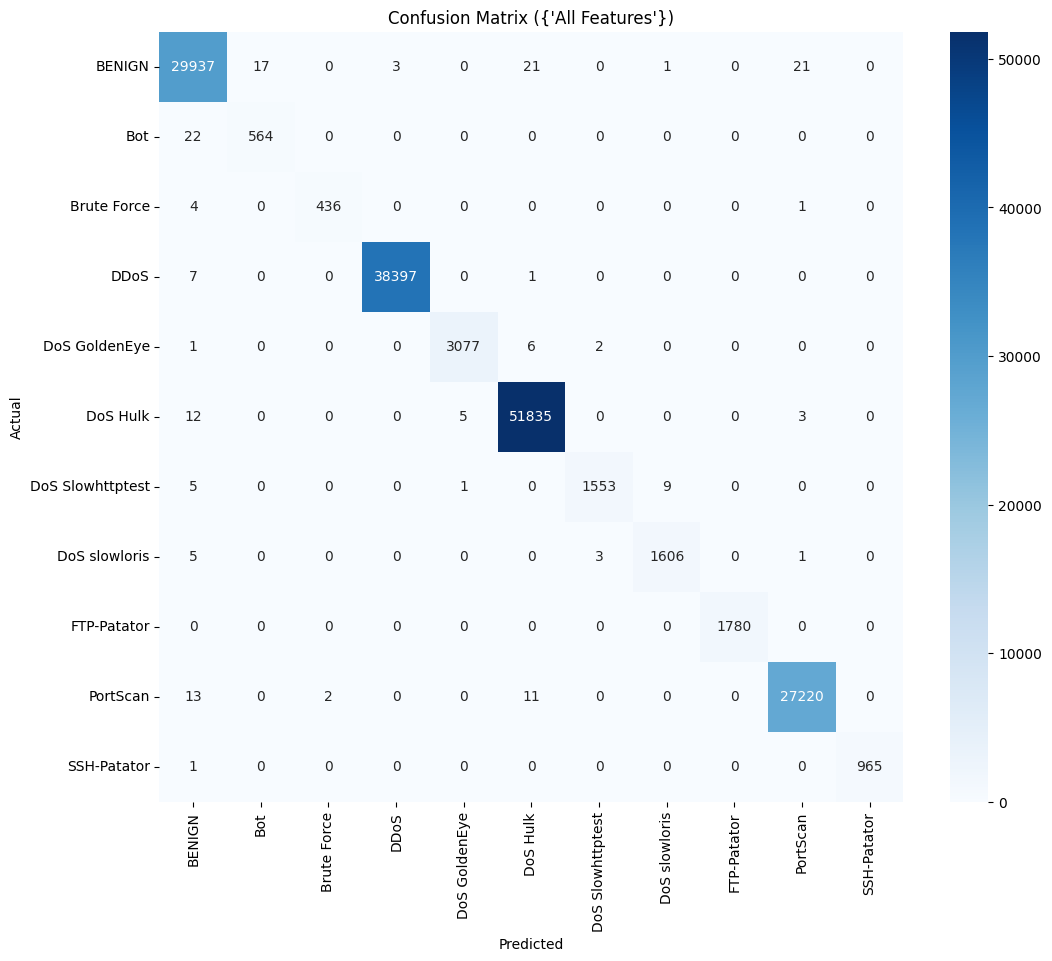

In [ ]:

from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import time
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append('../XAI_Evalation_For_IDS_datasets/Datasets_prepration')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

le, X, y, X_train, X_test, y_train, y_test, df  = data_preprocessing()
import time
start_total_time = time.time()
dt_model = RandomForestClassifier()

start_train_time = time.time()
dt_model.fit(X_train, y_train)
end_train_time = time.time()
start_pred_time = time.time()
y_pred_encoded_class = dt_model.predict(X_test)
end_pred_time = time.time()
end_total_time = time.time()

total_time = end_total_time - start_total_time
training_time = end_train_time - start_train_time
prediction_time = end_pred_time - start_pred_time

print("Number of samples before training:", len(X_train))
print(f"Total time: {total_time} seconds")
print(f"Training time: {training_time} seconds")
print(f"Prediction time: {prediction_time} seconds")

y_pred_class = le.inverse_transform(y_pred_encoded_class)
y_test_labels = le.inverse_transform(y_test)

metrics = evaluate_model(y_test_labels, y_pred_class, f" RF ({{'All Features'}})")

plot_confusion_matrix(y_test_labels, y_pred_class, le.classes_, f"Confusion Matrix ({{'All Features'}})")
# ----------------------------- XAI methods --------------------------------

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Methods')
from SHAP import explain_with_shap
from LIME import explain_with_lime

shap_values, Shap_explainer = explain_with_shap(dt_model, X_train, X_test, model_type=None, num_samples=5000)




lime_explianer, Lime_exp_Inst = explain_with_lime(
    model=dt_model,
    X_train=X_train,
    X_test=X_test,
    mode='classification',
    num_features=77,
    num_samples=5000,      
    kernel_width=None,     
    random_state=42,       
    discretize_continuous=True,
    return_instance_exp=True
)


In [2]:
print("SHAP values shape:", shap_values.shape)
print ("SHAP explainer:", Shap_explainer)
# display ("shap_values:", shap_values)

SHAP values shape: (5000, 76, 11)
SHAP explainer: <shap.explainers._tree.TreeExplainer object at 0x788756283550>


In [ ]:
print("LIME explainer:", lime_explianer)
print("LIME explanation instance:", Lime_exp_Inst)
print("LIME explanation instance details:", Lime_exp_Inst.as_list())


LIME explainer: <lime.lime_tabular.LimeTabularExplainer object at 0x7887609cd4e0>
LIME explanation instance: <lime.explanation.Explanation object at 0x7887562b8eb0>
LIME explanation instance details: [('Destination Port <= 80.00', -0.009697597154543679), ('RST Flag Count <= 0.00', -0.002236791203815371), ('Bwd Packet Length Max > 5792.00', -0.001758494832572977), ('SYN Flag Count <= 0.00', -0.0016853852304925354), ('Fwd PSH Flags <= 0.00', 0.001635270964632954), ('ECE Flag Count <= 0.00', 0.0015977853836287078), ('0.00 < Fwd Packet Length Std <= 9.90', -0.0015217668498546792), ('0.00 < Init_Win_bytes_backward <= 229.00', -0.0014854878669605296), ('6.00 < Fwd Packet Length Mean <= 8.67', -0.0013377911208709962), ('Idle Max > 84400000.00', -0.0012418943682123056), ('0.00 < Bwd IAT Min <= 4.00', -0.0012045863066489505), ('PSH Flag Count <= 0.00', -0.0011089741230655412), ('Bwd Packet Length Mean > 1932.50', -0.0010960925235835224), ('Bwd Packets/s <= 0.06', -0.0010432078560354077), ('Tota

EVALUATING EXPLANATORY POWER

--- SHAP Explanatory Power ---
Mean Raw Power: 0.7827
Std Raw Power: 0.0793
Min Raw Power: 0.5590
Max Raw Power: 1.0014
Mean Normalized Power: 0.7845
Std Normalized Power: 0.0803
R² Score: -163.7173
  ✗ Warning: SHAP explanations may not fully capture model behavior

--- LIME Explanatory Power ---
Mean Raw Power: 0.3996
Std Raw Power: 0.1269
Min Raw Power: 0.0562
Max Raw Power: 0.6297
Mean Normalized Power: 0.4006
Std Normalized Power: 0.1281
R² Score: -1166.9989
  ✗ Warning: LIME explanations may not fully capture model behavior

--- SHAP vs LIME Comparison ---
               Metric        SHAP         LIME
       Mean Raw Power    0.782715     0.399635
Mean Normalized Power    0.784476     0.400584
             R² Score -163.717271 -1166.998873
        Std Raw Power    0.079317     0.126943
✓ SHAP has better explanatory power for this model

--- Distribution Analysis ---

SHAP Power Distribution Percentiles:
  25th percentile: 0.6966
  50th percentile: 0

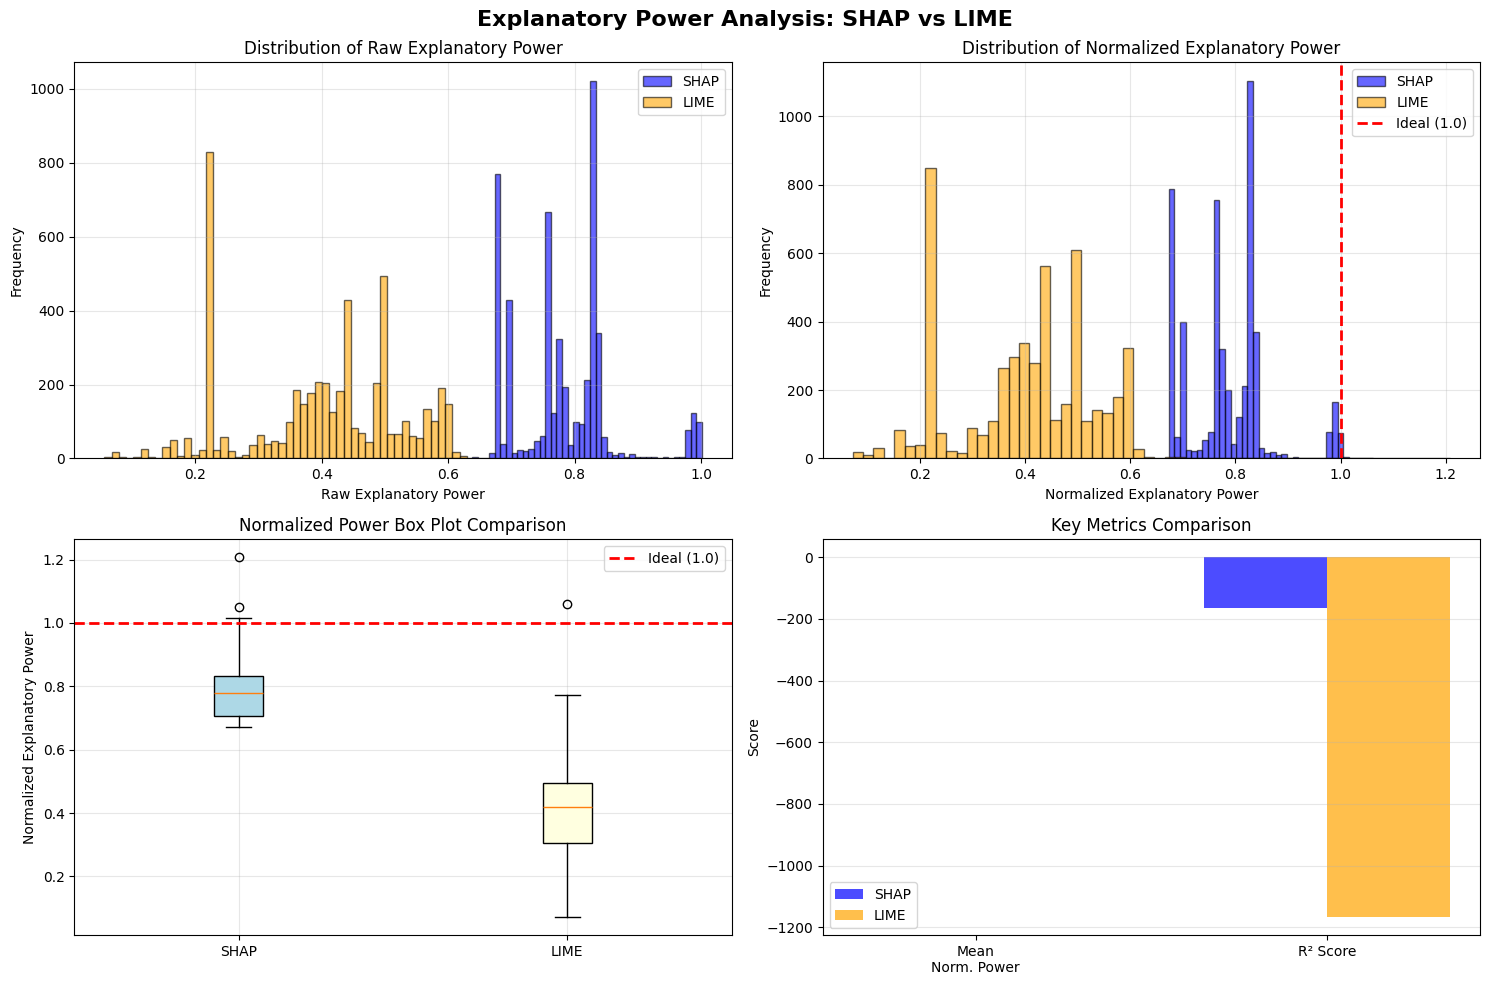

✓ Visualizations created successfully

EXPLANATORY POWER EVALUATION COMPLETE


In [ ]:
import sys
import importlib
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Explanatory_Power
importlib.reload(Explanatory_Power)
from Explanatory_Power import XAIExplanatoryPowerEvaluator

ep_evaluator = XAIExplanatoryPowerEvaluator(model=dt_model, n_jobs=-1)

print("=" * 80)
print("EVALUATING EXPLANATORY POWER")
print("=" * 80)


print("\n--- SHAP Explanatory Power ---")
shap_results_predicted = ep_evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.head(5000),
    method='shap',
    normalization='output',
    class_idx=None
)


shap_summary = {
    'Mean Raw Power': shap_results_predicted['mean_raw_power'],
    'Std Raw Power': shap_results_predicted['std_raw_power'],
    'Min Raw Power': shap_results_predicted['min_raw_power'],
    'Max Raw Power': shap_results_predicted['max_raw_power'],
    'Mean Normalized Power': shap_results_predicted['mean_normalized_power'],
    'Std Normalized Power': shap_results_predicted['std_normalized_power'],
    'R² Score': shap_results_predicted['r2_score']
}

for key, value in shap_summary.items():
    print(f"{key}: {value:.4f}")


if shap_results_predicted['r2_score'] > 0.8:
    print("  ✓ Excellent: SHAP explanations highly correlate with model outputs")
elif shap_results_predicted['r2_score'] > 0.6:
    print("  ~ Good: SHAP explanations reasonably correlate with model outputs")
else:
    print("  ✗ Warning: SHAP explanations may not fully capture model behavior")


print("\n" + "=" * 80)
print("--- LIME Explanatory Power ---")
lime_results = ep_evaluator.evaluate(
    explainer=lime_explianer,
    X=X_test.head(5000),
    method='lime',
    normalization='output',
    class_idx=None
)


lime_summary = {
    'Mean Raw Power': lime_results['mean_raw_power'],
    'Std Raw Power': lime_results['std_raw_power'],
    'Min Raw Power': lime_results['min_raw_power'],
    'Max Raw Power': lime_results['max_raw_power'],
    'Mean Normalized Power': lime_results['mean_normalized_power'],
    'Std Normalized Power': lime_results['std_normalized_power'],
    'R² Score': lime_results['r2_score']
}

for key, value in lime_summary.items():
    print(f"{key}: {value:.4f}")


if lime_results['r2_score'] > 0.8:
    print("  ✓ Excellent: LIME explanations highly correlate with model outputs")
elif lime_results['r2_score'] > 0.6:
    print("  ~ Good: LIME explanations reasonably correlate with model outputs")
else:
    print("  ✗ Warning: LIME explanations may not fully capture model behavior")


print("\n" + "=" * 80)
print("--- SHAP vs LIME Comparison ---")
comparison_df = pd.DataFrame({
    'Metric': ['Mean Raw Power', 'Mean Normalized Power', 'R² Score', 'Std Raw Power'],
    'SHAP': [
        shap_results_predicted['mean_raw_power'],
        shap_results_predicted['mean_normalized_power'],
        shap_results_predicted['r2_score'],
        shap_results_predicted['std_raw_power']
    ],
    'LIME': [
        lime_results['mean_raw_power'],
        lime_results['mean_normalized_power'],
        lime_results['r2_score'],
        lime_results['std_raw_power']
    ]
})

print(comparison_df.to_string(index=False))

shap_score = (shap_results_predicted['r2_score'] + 
              (1 if 0.8 <= shap_results_predicted['mean_normalized_power'] <= 1.2 else 0.5))
lime_score = (lime_results['r2_score'] + 
              (1 if 0.8 <= lime_results['mean_normalized_power'] <= 1.2 else 0.5))

if shap_score > lime_score:
    print("✓ SHAP has better explanatory power for this model")
elif lime_score > shap_score:
    print("✓ LIME has better explanatory power for this model")
else:
    print("~ SHAP and LIME have similar explanatory power")


print("\n" + "=" * 80)
print("--- Distribution Analysis ---")
shap_percentiles = np.percentile(shap_results_predicted['raw_powers'], [25, 50, 75, 90, 95])
lime_percentiles = np.percentile(lime_results['raw_powers'], [25, 50, 75, 90, 95])

print("\nSHAP Power Distribution Percentiles:")
for p, value in zip([25, 50, 75, 90, 95], shap_percentiles):
    print(f"  {p}th percentile: {value:.4f}")

print("\nLIME Power Distribution Percentiles:")
for p, value in zip([25, 50, 75, 90, 95], lime_percentiles):
    print(f"  {p}th percentile: {value:.4f}")


print("\n" + "=" * 80)
print("--- Creating Visualizations ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Explanatory Power Analysis: SHAP vs LIME', fontsize=16, fontweight='bold')


axes[0, 0].hist(shap_results_predicted['raw_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 0].hist(lime_results['raw_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 0].set_xlabel('Raw Explanatory Power')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Raw Explanatory Power')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)


axes[0, 1].hist(shap_results_predicted['normalized_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 1].hist(lime_results['normalized_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Normalized Explanatory Power')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Normalized Explanatory Power')
axes[0, 1].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


box_data = [shap_results_predicted['normalized_powers'], lime_results['normalized_powers']]
bp = axes[1, 0].boxplot(box_data, labels=['SHAP', 'LIME'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightyellow')
axes[1, 0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[1, 0].set_ylabel('Normalized Explanatory Power')
axes[1, 0].set_title('Normalized Power Box Plot Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)


metrics_names = ['Mean\nNorm. Power', 'R² Score']
shap_metrics = [shap_results_predicted['mean_normalized_power'], shap_results_predicted['r2_score']]
lime_metrics = [lime_results['mean_normalized_power'], lime_results['r2_score']]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 1].bar(x - width/2, shap_metrics, width, label='SHAP', color='blue', alpha=0.7)
axes[1, 1].bar(x + width/2, lime_metrics, width, label='LIME', color='orange', alpha=0.7)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Key Metrics Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Visualizations created successfully")
print("\n" + "=" * 80)
print("EXPLANATORY POWER EVALUATION COMPLETE")
print("=" * 80)

In [ ]:
import pickle
import os

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Save SHAP and LIME results
model_name = 'CIC_Exp_Pow_RandomForest'  # Change for each notebook: 'DecisionTree', 'LogisticRegression', 'XGBoost'

results_to_save = {
    'model_name': model_name,
    'shap': {
        'normalized_powers': shap_results_predicted['normalized_powers'],
        'mean_normalized_power': shap_results_predicted['mean_normalized_power'],
        'std_normalized_power': shap_results_predicted['std_normalized_power'],
        'r2_score': shap_results_predicted['r2_score'],
        'mean_raw_power': shap_results_predicted['mean_raw_power'],
        'std_raw_power': shap_results_predicted['std_raw_power'],
    },
    'lime': {
        'normalized_powers': lime_results['normalized_powers'],
        'mean_normalized_power': lime_results['mean_normalized_power'],
        'std_normalized_power': lime_results['std_normalized_power'],
        'r2_score': lime_results['r2_score'],
        'mean_raw_power': lime_results['mean_raw_power'],
        'std_raw_power': lime_results['std_raw_power'],
    }
}

# Save to pickle file
with open(f'results/{model_name}_explanatory_power.pkl', 'wb') as f:
    pickle.dump(results_to_save, f)

print(f"Results saved to results/{model_name}_explanatory_power.pkl")

Evaluating on 500 samples...

SHAP Explanatory Power Results:
Mean Raw Power: 0.8459
Mean Normalized Power: 0.8459 (84.6%)
R² Score: 0.0000
Power Range: 0.7253 - 1.2229

LIME Explanatory Power Results:
Mean Raw Power: 1.1472
Mean Normalized Power: 1.1472 (114.7%)
R² Score: 0.0000
Power Range: 0.0883 - 1.9126

Comparison:
SHAP vs LIME Mean Power Ratio: 0.74
SHAP vs LIME R² Score Difference: 0.0000

Debugging Information:
First 10 model outputs (for normalization): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
First 10 SHAP raw powers: [0.77907113 0.82005409 0.83311247 0.76876483 0.76876483 0.76579193
 0.85690278 0.76876861 1.01134694 0.76575775]
First 10 LIME raw powers: [1.65430898 1.48579652 0.32184398 0.68920367 0.69323694 0.55201915
 1.82541467 0.68920367 0.89061429 0.55502662]


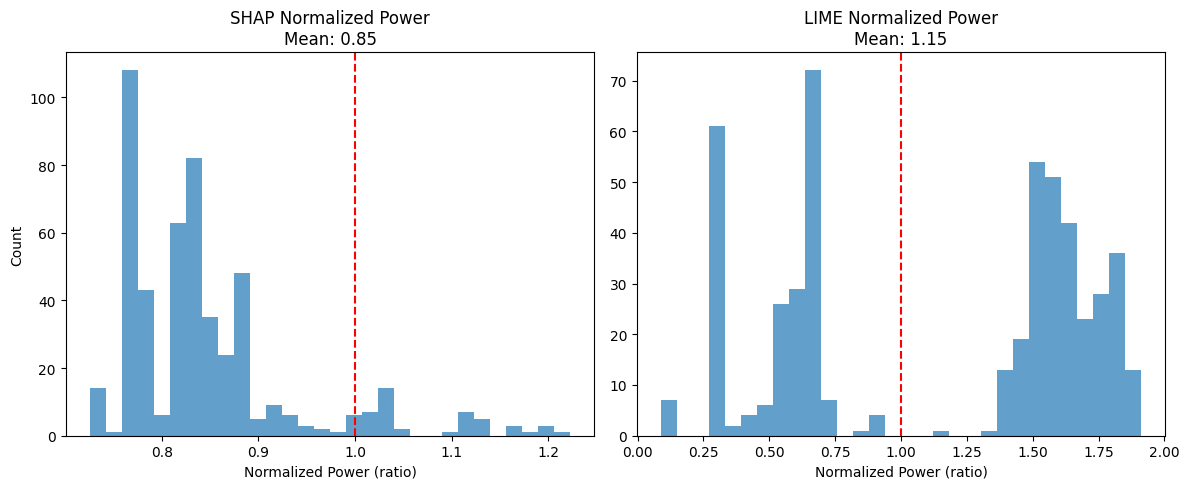

In [ ]:
# --- Explanatory Power Evaluation ---
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

# Reload the module to ensure we have the latest version
sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Explanatory_Power
importlib.reload(Explanatory_Power)
from Explanatory_Power import XAIExplanatoryPowerEvaluator

# Create evaluator instance with your model
evaluator = XAIExplanatoryPowerEvaluator(dt_model)

# Convert test data to DataFrame if it's not already
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Select a sample subset for faster evaluation (optional)
sample_size = 500
X_sample = X_test_df.sample(min(sample_size, len(X_test_df)), random_state=42)

print(f"Evaluating on {len(X_sample)} samples...")

# ---- SHAP Evaluation ----
shap_results = evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_sample,
    method='shap',
    normalization='output',
    class_idx=None  # None uses predicted class, or specify a class index (0-10)
)

# Print summary statistics (not the full arrays)
print("\nSHAP Explanatory Power Results:")
print(f"Mean Raw Power: {shap_results['mean_raw_power']:.4f}")
print(f"Mean Normalized Power: {shap_results['mean_normalized_power']:.4f} ({shap_results['mean_normalized_power']*100:.1f}%)")
print(f"R² Score: {shap_results['r2_score']:.4f}")
print(f"Power Range: {shap_results['min_raw_power']:.4f} - {shap_results['max_raw_power']:.4f}")

# ---- LIME Evaluation ----
lime_results = evaluator.evaluate(
    explainer=lime_explianer,
    X=X_sample,
    method='lime',
    normalization='output',
    class_idx=None  
)

# Print summary statistics for LIME
print("\nLIME Explanatory Power Results:")
print(f"Mean Raw Power: {lime_results['mean_raw_power']:.4f}")
print(f"Mean Normalized Power: {lime_results['mean_normalized_power']:.4f} ({lime_results['mean_normalized_power']*100:.1f}%)")
print(f"R² Score: {lime_results['r2_score']:.4f}")
print(f"Power Range: {lime_results['min_raw_power']:.4f} - {lime_results['max_raw_power']:.4f}")





# ---- Optional: Compare SHAP and LIME ----
print("\nComparison:")
print(f"SHAP vs LIME Mean Power Ratio: {shap_results['mean_raw_power']/lime_results['mean_raw_power']:.2f}")
print(f"SHAP vs LIME R² Score Difference: {shap_results['r2_score']-lime_results['r2_score']:.4f}")

# ----- Debugging Information ----
print("\nDebugging Information:")
print("First 10 model outputs (for normalization):", evaluator.model.predict_proba(X_sample)[np.arange(len(X_sample)), evaluator.model.predict(X_sample).astype(int)][:10])
print("First 10 SHAP raw powers:", shap_results['raw_powers'][:10])
print("First 10 LIME raw powers:", lime_results['raw_powers'][:10])


# ---- Optional: Visualize Results ----
# Histogram of normalized powers
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(shap_results['normalized_powers'], bins=30, alpha=0.7)
plt.axvline(1.0, color='red', linestyle='--')
plt.title(f"SHAP Normalized Power\nMean: {shap_results['mean_normalized_power']:.2f}")
plt.xlabel("Normalized Power (ratio)")
plt.ylabel("Count")

plt.subplot(122)
plt.hist(lime_results['normalized_powers'], bins=30, alpha=0.7)
plt.axvline(1.0, color='red', linestyle='--')
plt.title(f"LIME Normalized Power\nMean: {lime_results['mean_normalized_power']:.2f}")
plt.xlabel("Normalized Power (ratio)")

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------
Consistency Results Interpretation (for Research Paper)

- Consistency measures the stability of XAI explanations (LIME/SHAP) when the input is slightly perturbed.
- High mean cosine similarity indicates that the explanation method produces stable, reliable attributions
  for small changes in the input (desirable for trustworthy XAI).
- Low consistency suggests that explanations are sensitive to noise, which may undermine their reliability.
- Comparing LIME and SHAP: The method with higher mean and lower std is more robust for this model/dataset.

Use the summary table and plots below to:
  - Quantitatively compare the stability of LIME vs SHAP explanations.
  - Support claims about explanation robustness in the results/discussion section of your paper.
-----------------------------------------------------------------------------


In [2]:
# Define which features are considered "actionable" in a network security context
# These are features that security professionals could reasonably modify
actionable_features = [col for col in X_test.columns if any(x in col.lower() for x in 
                      ['rate', 'flag', 'port', 'protocol', 'count', 'packet', 'byte'])]

print(f"Number of total features: {len(X_test.columns)}")
print(f"Number of actionable features: {len(actionable_features)}")
print("Sample of actionable features:", actionable_features[:76])

Number of total features: 76
Number of actionable features: 45
Sample of actionable features: ['Destination Port', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Pac

==== ACTIONABILITY SUMMARY ====
LIME Actionability Mean Score: 0.76537623915326
SHAP Actionability Mean Score: 0.972640810719232
==== Actionability Summary Table ====


,Method,Mean,Std,Median,N
0,LIME,0.765376,0.060768,0.766043,1000
1,SHAP,0.972641,0.020370,0.971956,1000



==== Comparison (LIME vs SHAP) ====


,Paired t-stat,Paired p-value,Cohen's d (paired),Pearson r,Pearson p-value,Significant (alpha=0.05)
0,-104.772,0.00e+00,-3.313,0.078,1.31e-02,Yes


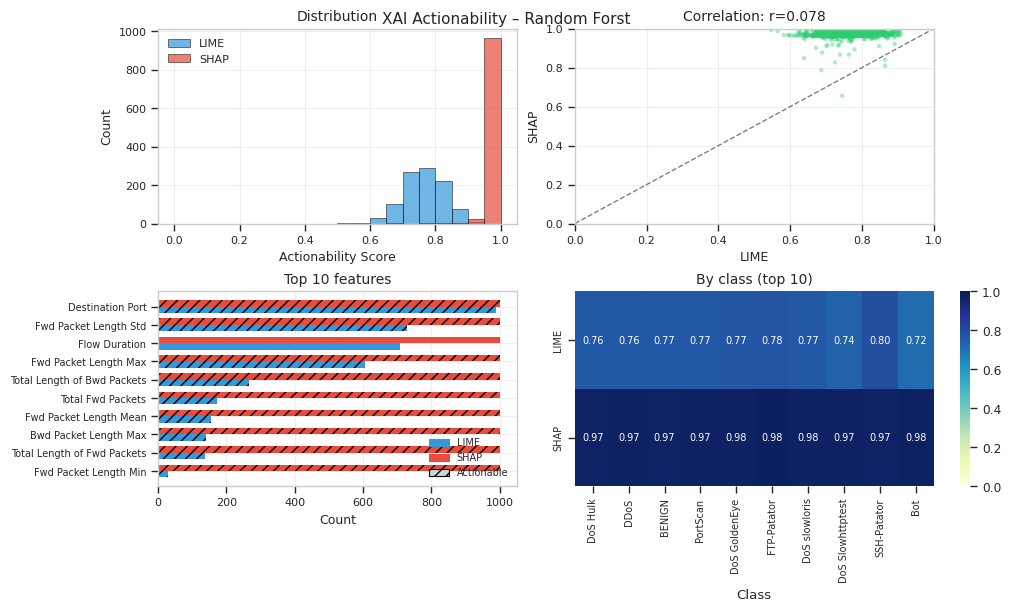

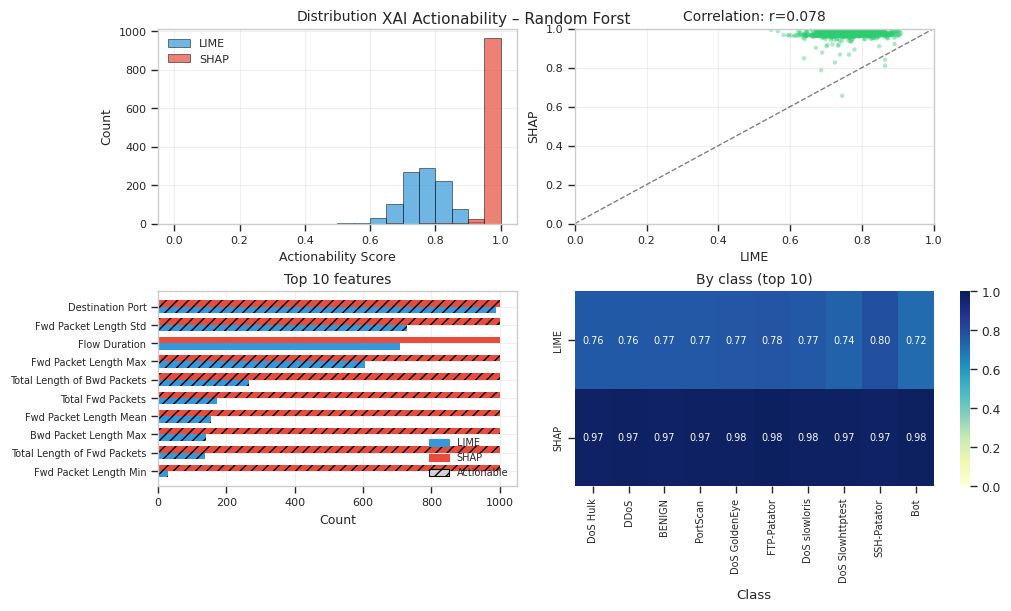

In [ ]:
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Actionability
importlib.reload(Actionability)
import warnings
warnings.filterwarnings('ignore')

actionability_evaluator = Actionability.XAIActionabilityEvaluator(dt_model)

def get_detailed_actionability_results(evaluator, explainer, X, method, actionable_features, 
                                     top_k=15, sample_size=None, random_state=42):
    results = evaluator.evaluate_actionability(
        explainer=explainer,
        X=X,
        method=method,
        actionable_features=actionable_features,
        top_k=top_k,
        verbose=False,
        sample_size=sample_size,
        random_state=random_state,
        return_details=True   
    )
    return results


lime_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=lime_explianer,
    X=X_test,
    method='lime',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=1000  
)

shap_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=Shap_explainer,
    X=X_test,
    method='shap',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=1000 
)



y_pred_encoded = dt_model.predict(X_test)
class_names = le.classes_

print("==== ACTIONABILITY SUMMARY ====")
print("LIME Actionability Mean Score:", lime_results['mean_score'])
print("SHAP Actionability Mean Score:", shap_results['mean_score'])



lime_scores = np.asarray(lime_results['instance_scores'], dtype=float)
shap_scores = np.asarray(shap_results['instance_scores'], dtype=float)
n = min(len(lime_scores), len(shap_scores))
lime_scores = lime_scores[:n]
shap_scores = shap_scores[:n]


def summarize(arr):
    return {
        "mean": float(np.mean(arr)),
        "std": float(np.std(arr, ddof=1)),
        "median": float(np.median(arr)),
        "n": int(len(arr))
    }

lime_summary = summarize(lime_scores)
shap_summary = summarize(shap_scores)

t_stat, p_ttest = stats.ttest_rel(lime_scores, shap_scores, nan_policy='omit')
diff = lime_scores - shap_scores
cohens_d = float(np.mean(diff) / (np.std(diff, ddof=1) + 1e-12))


r_corr, p_corr = stats.pearsonr(lime_scores, shap_scores)

summary_table = pd.DataFrame([
    {"Method": "LIME", "Mean": lime_summary["mean"], "Std": lime_summary["std"], "Median": lime_summary["median"], "N": lime_summary["n"]},
    {"Method": "SHAP", "Mean": shap_summary["mean"], "Std": shap_summary["std"], "Median": shap_summary["median"], "N": shap_summary["n"]},
])

comparison_table = pd.DataFrame([{
    "Paired t-stat": float(t_stat),
    "Paired p-value": float(p_ttest),
    "Cohen's d (paired)": cohens_d,
    "Pearson r": float(r_corr),
    "Pearson p-value": float(p_corr),
    "Significant (alpha=0.05)": "Yes" if p_ttest < 0.05 else "No"
}])

print("==== Actionability Summary Table ====")
display(summary_table.style.format({"Mean": "{:.6f}", "Std": "{:.6f}", "Median": "{:.6f}"}))
print("\n==== Comparison (LIME vs SHAP) ====")
display(comparison_table.style.format({"Paired p-value": "{:.2e}", "Pearson p-value": "{:.2e}", "Paired t-stat": "{:.3f}", "Pearson r": "{:.3f}", "Cohen's d (paired)": "{:.3f}"}))


Actionability.XAIActionabilityEvaluator.visualize_actionability_results(
    lime_results, shap_results, actionable_features, model_name="Random Forst",     y_pred=y_pred_encoded,
    class_names=class_names
)



Running Complete Evaluation Pipeline for RF CICIDS2017 Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 20; using n=20.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for RF CICIDS2017 Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 50; using n=50.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for RF CICIDS2017 Datase

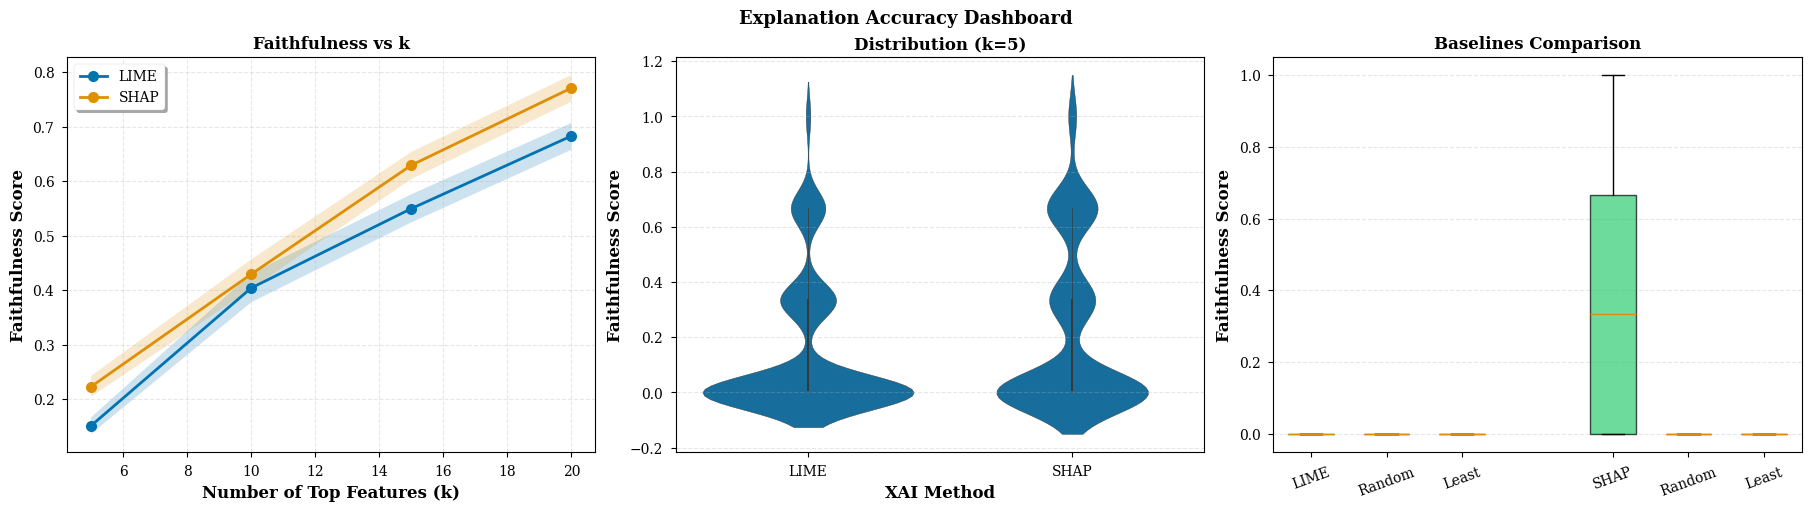


--- Generating Summary Report ---
  Saved: Exp_Acc_CIC_RF_results/summary_report.txt

DT COMPLETE! All results saved to ./results/

Generated files:
  - tables/main_results.csv & .tex
  - tables/validation.csv & .tex
  - figures/faithfulness_by_k.pdf & .png
  - figures/distribution_comparison.pdf & .png
  - figures/baseline_comparison.pdf & .png
  - summary_report.txt
SHAP Faithfulness : 0.566
LIME Faithfulness : 0.502


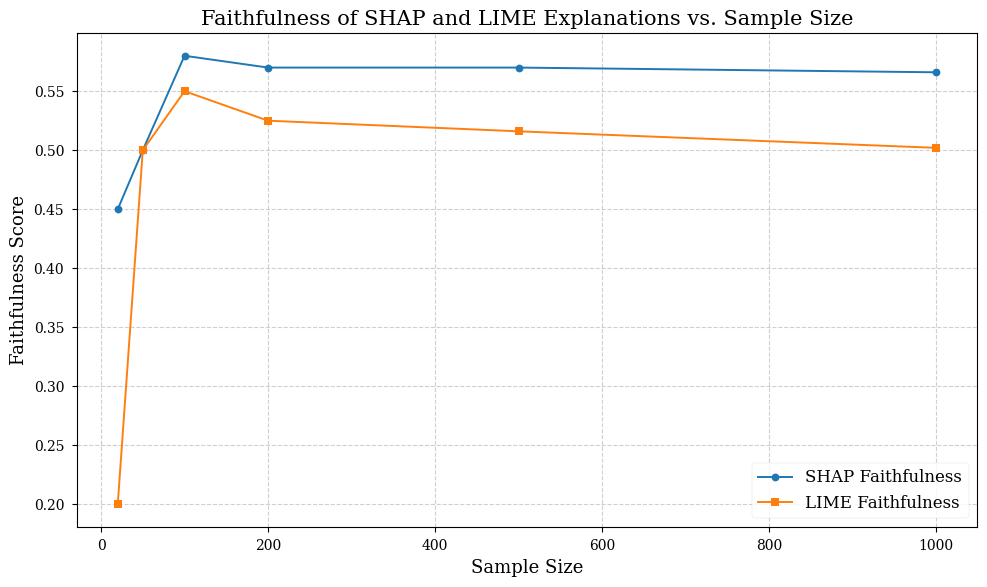

   instance_idx  faithfulness_score  \
0             0                 0.0   
1             1                 0.0   
2             2                 1.0   
3             3                 0.0   
4             4                 1.0   

                                    top_features_idx  \
0  [65, 6, 8, 61, 4, 63, 9, 66, 51, 67, 2, 12, 33...   
1  [6, 65, 61, 8, 4, 63, 9, 66, 5, 51, 67, 2, 38,...   
2  [65, 6, 4, 33, 61, 75, 72, 9, 63, 16, 74, 13, ...   
3  [6, 61, 4, 65, 8, 63, 9, 51, 67, 66, 38, 12, 3...   
4  [4, 2, 38, 61, 6, 35, 50, 19, 16, 8, 64, 65, 5...   

                                  top_features_names  \
0  [Init_Win_bytes_backward, Fwd Packet Length Ma...   
1  [Fwd Packet Length Max, Init_Win_bytes_backwar...   
2  [Init_Win_bytes_backward, Fwd Packet Length Ma...   
3  [Fwd Packet Length Max, Subflow Fwd Bytes, Tot...   
4  [Total Length of Fwd Packets, Total Fwd Packet...   

                                   importance_values  original_pred  
0  [0.062468576555458

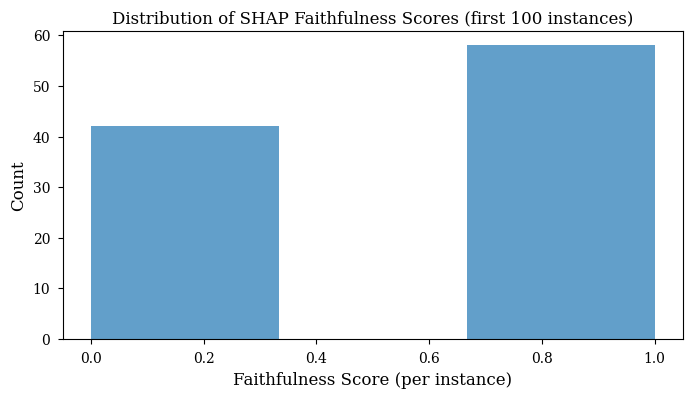

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import importlib
sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Accuracy_of_Explanation
importlib.reload(Accuracy_of_Explanation)

from Accuracy_of_Explanation import XAIExplanationAccuracyEvaluator , PaperResultsGenerator

evaluator = XAIExplanationAccuracyEvaluator(
    model=dt_model,
    perturbation_strategy='median',  # or 'zero', 'median', 'noise', 'random'
    task='classification'
)

sample_sizes = [20, 50, 100, 200, 500, 1000]
faithfulness_shap_scores = []
faithfulness_lime_scores = []

generator = PaperResultsGenerator(output_dir="./Exp_Acc_CIC_RF_results")
for size in sample_sizes:
    X_sample = X_test.iloc[:size]
    faithfulness_shap = evaluator.evaluate(
        explainer=Shap_explainer,
        X=X_sample,
        method='shap',
        top_k=15,
        return_details=False
    )
    faithfulness_lime = evaluator.evaluate(
        explainer=lime_explianer,
        X=X_sample,
        method='lime',
        top_k=15,
        return_details=False
    )
    faithfulness_shap_scores.append(faithfulness_shap)
    faithfulness_lime_scores.append(faithfulness_lime)

    results = generator.run_complete_evaluation(
        model=dt_model,
        X=X_sample,
        explainer_lime=lime_explianer,
        explainer_shap=Shap_explainer,
        dataset_name="RF CICIDS2017 Dataset",  
        top_k_values=[5 , 10 , 15 , 20 ],
        n_samples_validation=1000
    )

generator.generate_tables(results)
generator.generate_figures(results)
generator.generate_summary_report(results)

print("\n" + "="*70)
print("DT COMPLETE! All results saved to ./results/")
print("="*70)
print("\nGenerated files:")
print("  - tables/main_results.csv & .tex")
print("  - tables/validation.csv & .tex")
print("  - figures/faithfulness_by_k.pdf & .png")
print("  - figures/distribution_comparison.pdf & .png")
print("  - figures/baseline_comparison.pdf & .png")
print("  - summary_report.txt")

print(f"SHAP Faithfulness :", faithfulness_shap)
print(f"LIME Faithfulness :", faithfulness_lime)


plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, faithfulness_shap_scores, marker='o', label='SHAP Faithfulness', color='tab:blue')
plt.plot(sample_sizes, faithfulness_lime_scores, marker='s', label='LIME Faithfulness', color='tab:orange')
plt.xlabel('Sample Size', fontsize=13)
plt.ylabel('Faithfulness Score', fontsize=13)
plt.title('Faithfulness of SHAP and LIME Explanations vs. Sample Size', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


details = evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.iloc[:100],
    method='shap',
    top_k=15,
    return_details=True
)
import pandas as pd
details_df = pd.DataFrame(details['details'])
print(details_df.head())

plt.figure(figsize=(8, 4))
plt.hist(details_df['faithfulness_score'], bins=3, color='tab:blue', alpha=0.7)
plt.xlabel('Faithfulness Score (per instance)')
plt.ylabel('Count')
plt.title('Distribution of SHAP Faithfulness Scores (first 100 instances)')
plt.show()
